## Loading libraries

In [3]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

## Loading data

In [4]:
data = pd.read_csv('/Users/claudia/Ironhack/Linear_Regression_Model/Linear_Regression_Model_House_Price/Datasets/df_2nd_iter.csv') 
data.head()

,Unnamed: 0,sqft_above,sqft_living15,bathrooms,view,sqft_basement,floors,grade,condition,yr_built,yr_renovated,floors.1,price
0,7316,1450,1260,1.0,0,0,1.0,7,4,1954,0,1.0,435000
1,20586,3310,2380,2.5,0,0,2.0,8,3,2012,0,2.0,555000
2,1040,1140,2200,2.5,0,800,1.0,7,4,1976,0,1.0,550000
3,20543,1280,1590,2.5,0,350,2.0,7,3,2009,0,2.0,295000
4,9587,1700,2380,2.5,0,900,1.0,9,4,1951,0,1.0,790000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   sqft_above     21597 non-null  int64  
 2   sqft_living15  21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   view           21597 non-null  int64  
 5   sqft_basement  21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   grade          21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   yr_built       21597 non-null  int64  
 10  yr_renovated   21597 non-null  int64  
 11  floors.1       21597 non-null  float64
 12  price          21597 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 2.1 MB


In [6]:
data = data.drop(['Unnamed: 0', 'floors.1'], axis=1)

## Splitting the dataset between the categorical and numerical columns

In [7]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)


print("Dataframe of numerical columns: ")
print()

display(numericals)

print("Dataframe of categorical columns: ")
print()

display(categoricals)

Dataframe of numerical columns: 



,sqft_above,sqft_living15,bathrooms,view,sqft_basement,floors,grade,condition,yr_built,yr_renovated,price
0,1450,1260,1.00,0,0,1.0,7,4,1954,0,435000
1,3310,2380,2.50,0,0,2.0,8,3,2012,0,555000
2,1140,2200,2.50,0,800,1.0,7,4,1976,0,550000
3,1280,1590,2.50,0,350,2.0,7,3,2009,0,295000
4,1700,2380,2.50,0,900,1.0,9,4,1951,0,790000
...,...,...,...,...,...,...,...,...,...,...,...
21592,1380,1810,1.75,1,600,1.0,8,4,1960,0,725000
21593,1410,2950,2.00,0,0,1.0,7,4,1985,0,335000
21594,1870,1870,2.00,0,0,1.5,7,3,1960,0,450000
21595,720,920,1.75,0,670,1.0,6,3,1941,0,445500


Dataframe of categorical columns: 



""
0
1
2
3
4
...
21592
21593
21594
21595


## Normalising with StandardScaler

In [8]:
#Lets apply scaling to the numerical columns except the final column
#which will be our y variable, average gift

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals.iloc[:,:-1])
scaled_numericals = transformer.transform(numericals.iloc[:,:-1])

Getting a dataframe with the result from the standard scaler which is a numpy array.

As the numpy arrays doesn't have column names, we pick up the column names from the numerical (original) dataframe.

In [9]:
pdscaled_numericals= pd.DataFrame(scaled_numericals,columns=numericals.columns.tolist()[:-1])

In [10]:
pdscaled_numericals.head()

,sqft_above,sqft_living15,bathrooms,view,sqft_basement,floors,grade,condition,yr_built,yr_renovated
0,-0.409062,-1.060427,-1.451073,-0.305715,-0.659031,-0.915552,-0.560800,0.907220,-0.578721,-0.21021
1,1.838019,0.574097,0.499597,-0.305715,-0.659031,0.937431,0.291589,-0.629986,1.395777,-0.21021
2,-0.783575,0.311406,0.499597,-0.305715,1.148235,-0.915552,-0.560800,0.907220,0.170226,-0.21021
3,-0.614440,-0.578826,0.499597,-0.305715,0.131648,0.937431,-0.560800,-0.629986,1.293648,-0.21021
4,-0.107035,0.574097,0.499597,-0.305715,1.374143,-0.915552,1.143979,0.907220,-0.680850,-0.21021


## Putting everything together

In [11]:
full = pd.concat([pdscaled_numericals.iloc[:,:-1],numericals.iloc[:,-1]],axis=1)
print("The dataset size is: ", full.shape)
print()
full

The dataset size is:  (21597, 10)



,sqft_above,sqft_living15,bathrooms,view,sqft_basement,floors,grade,condition,yr_built,price
0,-0.409062,-1.060427,-1.451073,-0.305715,-0.659031,-0.915552,-0.560800,0.907220,-0.578721,435000
1,1.838019,0.574097,0.499597,-0.305715,-0.659031,0.937431,0.291589,-0.629986,1.395777,555000
2,-0.783575,0.311406,0.499597,-0.305715,1.148235,-0.915552,-0.560800,0.907220,0.170226,550000
3,-0.614440,-0.578826,0.499597,-0.305715,0.131648,0.937431,-0.560800,-0.629986,1.293648,295000
4,-0.107035,0.574097,0.499597,-0.305715,1.374143,-0.915552,1.143979,0.907220,-0.680850,790000
...,...,...,...,...,...,...,...,...,...,...
21592,-0.493629,-0.257759,-0.475738,0.999134,0.696419,-0.915552,0.291589,0.907220,-0.374463,725000
21593,-0.457386,1.405953,-0.150626,-0.305715,-0.659031,-0.915552,-0.560800,0.907220,0.476614,335000
21594,0.098344,-0.170195,-0.150626,-0.305715,-0.659031,0.010939,-0.560800,-0.629986,-0.374463,450000
21595,-1.290980,-1.556622,-0.475738,-0.305715,0.854554,-0.915552,-1.413190,-0.629986,-1.021281,445500


In [12]:
full.columns.tolist()

['sqft_above',
 'sqft_living15',
 'bathrooms',
 'view',
 'sqft_basement',
 'floors',
 'grade',
 'condition',
 'yr_built',
 'price']

In [13]:
full_x = pd.DataFrame(full,columns=full.columns.tolist()[:-1])
full_x.head()

,sqft_above,sqft_living15,bathrooms,view,sqft_basement,floors,grade,condition,yr_built
0,-0.409062,-1.060427,-1.451073,-0.305715,-0.659031,-0.915552,-0.560800,0.907220,-0.578721
1,1.838019,0.574097,0.499597,-0.305715,-0.659031,0.937431,0.291589,-0.629986,1.395777
2,-0.783575,0.311406,0.499597,-0.305715,1.148235,-0.915552,-0.560800,0.907220,0.170226
3,-0.614440,-0.578826,0.499597,-0.305715,0.131648,0.937431,-0.560800,-0.629986,1.293648
4,-0.107035,0.574097,0.499597,-0.305715,1.374143,-0.915552,1.143979,0.907220,-0.680850


In [14]:
full_x.columns

Index(['sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement',
       'floors', 'grade', 'condition', 'yr_built'],
      dtype='object')

In [15]:
full_x

,sqft_above,sqft_living15,bathrooms,view,sqft_basement,floors,grade,condition,yr_built
0,-0.409062,-1.060427,-1.451073,-0.305715,-0.659031,-0.915552,-0.560800,0.907220,-0.578721
1,1.838019,0.574097,0.499597,-0.305715,-0.659031,0.937431,0.291589,-0.629986,1.395777
2,-0.783575,0.311406,0.499597,-0.305715,1.148235,-0.915552,-0.560800,0.907220,0.170226
3,-0.614440,-0.578826,0.499597,-0.305715,0.131648,0.937431,-0.560800,-0.629986,1.293648
4,-0.107035,0.574097,0.499597,-0.305715,1.374143,-0.915552,1.143979,0.907220,-0.680850
...,...,...,...,...,...,...,...,...,...
21592,-0.493629,-0.257759,-0.475738,0.999134,0.696419,-0.915552,0.291589,0.907220,-0.374463
21593,-0.457386,1.405953,-0.150626,-0.305715,-0.659031,-0.915552,-0.560800,0.907220,0.476614
21594,0.098344,-0.170195,-0.150626,-0.305715,-0.659031,0.010939,-0.560800,-0.629986,-0.374463
21595,-1.290980,-1.556622,-0.475738,-0.305715,0.854554,-0.915552,-1.413190,-0.629986,-1.021281


In [16]:
#define X and y. 
#X is all the features, scaled numericals and encoded categoricals which are our independent variables
#y is the variable we seek to predict 

X = full_x
y = full['price']

In [17]:
# Normalazing Y 
sc_y = StandardScaler()
y = np.array(y).reshape(-1,1)
y = sc_y.fit_transform(y)
#y = y.flatten()
y

array([[-0.28663077],
       [ 0.04002461],
       [ 0.02641397],
       ...,
       [-0.24579884],
       [-0.25804842],
       [ 2.09523136]])

## Splitting data intro train and test sets.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Getting prediction with Linear Regression

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
#apply the machine learn model 
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
lm_predictions  = lm.predict(X_test)
r2_score(y_test, lm_predictions)
#use r2 score to see if this is closer to the data (ie better at predicating 
#target_d, than without the help of the learning process)

0.6256229485198577

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.40
The mean squared error of the model in the test set is:   0.44
The root mean squared error of the model in the test set is:   0.66
The R2 of the model in the test set is: 0.63


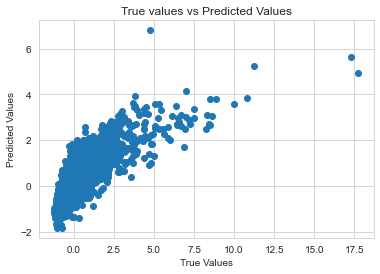

In [22]:
plt.scatter(x=y_test, y=lm_predictions)
plt.title("True values vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()

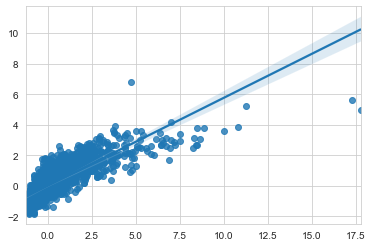

In [48]:
a = sns.regplot(x=y_test, y=lm_predictions);
fig = a.get_figure()
fig.savefig('/Users/claudia/Ironhack/Linear_Regression_Model', dpi = 300)

## Training the K-NN model

In [23]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=4) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

## Getting our predictions

In [24]:
knn_predictions = knn_model.predict(X_test)
# to get some predictions for y we use the x test set. 
# we will later compare the predictions from x test to real test y 

## Getting the error metrics of our K-NN model

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.37
The mean squared error of the model in the test set is:   0.41
The root mean squared error of the model in the test set is:   0.64
The R2 of the model in the test set is: 0.65


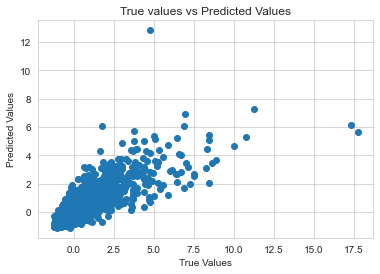

In [26]:
plt.scatter(x=y_test, y=knn_predictions)
plt.title("True values vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()

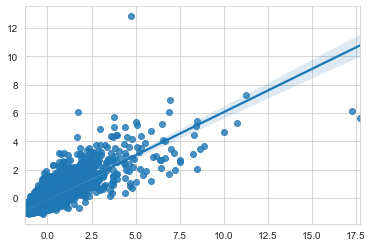

In [49]:
b = sns.regplot(x=y_test, y=knn_predictions);
fig = b.get_figure()
fig.savefig('/Users/claudia/Ironhack/Linear_Regression_Model', dpi = 300)

K 
Let's try to find the best K value from a pre-defined set of values.

In [27]:
scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(2,10): # The values of K. = 2,3,4,5,6,7,8,9
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Now let's plot how it changes the score as a function of K.

Text(0, 0.5, 'R2')

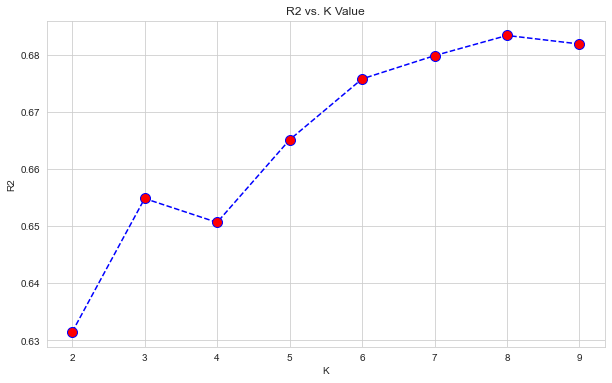

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

#threshold = 0.01 # minimum difference we want between two R2 consecutive values.
#delta = 10. # difference between two consecutive R2 values.
#k = 3 # initival value
#old_score = 0.

#while (delta >= threshold):
#  knn_model = KNeighborsRegressor(n_neighbors=k) # The keyword "n_neighbors" is what sets the K.
#  knn_model.fit(X_train, y_train)
#  knn_predictions = knn_model.predict(X_test) 
#  new_score = r2_score(y_test,knn_predictions)
#  delta = new_score - old_score
#  k = k + 4 
#  old_score = new_score

It looks like that with K=8 we could get a better prediction

In [29]:
knn_model = KNeighborsRegressor(n_neighbors=8) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [30]:
knn_predictions_k8 = knn_model.predict(X_test)

In [31]:
MAE = mean_absolute_error(y_test,knn_predictions_k8)
MSE = mean_squared_error(y_test,knn_predictions_k8)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions_k8)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.36
The mean squared error of the model in the test set is:   0.37
The root mean squared error of the model in the test set is:   0.61
The R2 of the model in the test set is: 0.68


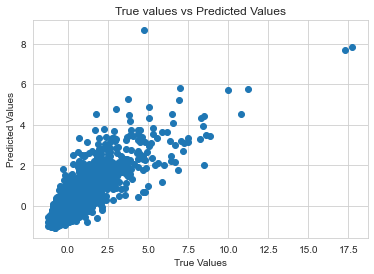

In [32]:
plt.scatter(x=y_test, y=knn_predictions_k8)
plt.title("True values vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()

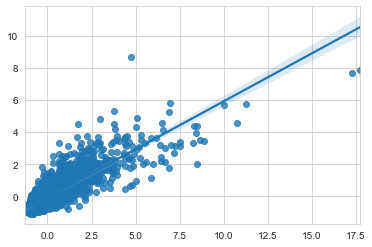

In [50]:
c = sns.regplot(x=y_test, y=knn_predictions_k8);
fig = c.get_figure()
fig.savefig('/Users/claudia/Ironhack/Linear_Regression_Model', dpi = 300)

## Best predicted score for this iteration is 0.68